In [2]:
from torch import Size
import rewards


import pandas as pd 
import numpy as np

from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from rdkit import Chem
drugs = pd.read_csv('../TrainingUtils/SupervisedTraining/SmallDrug.csv',error_bad_lines=False,delimiter=';')
smiles_values = drugs['Smiles'].values


In [8]:
class RewardProfiler():
    def __init__(self,path):
        
        drugs = pd.read_csv(path,error_bad_lines=False,delimiter=';')
        smiles_values = drugs['Smiles']
        
        self.mols  = []
        self.bad_smiles = []
        
        for smile in smiles_values:
            try:
                mol = Chem.MolFromSmiles(smile)
                self.mols.append(mol)
            
            except:
                self.bad_smiles.append(smile)
                
        print(f'succesfuly read in {len(self.mols)} molecules, failed on {len(self.bad_smiles)}')
        
    def profile(self,reward_module: rewards.SingleReward):
        rewards = list(map(lambda x: reward_module.giveReward(x), self.mols))            
        ae, loce, scalee = skewnorm.fit(rewards)
        mean = np.mean(rewards)
        
        plt.figure()
        plt.hist(rewards, alpha=0.6, color='g',bins=[(i-12)/20 for i in range(60)])
        # plt.hist(rewards, bins=[i for i in range(10)], density=True, alpha=0.6, color='g')
        # xmin, xmax = plt.xlim()
        # x = np.linspace(xmin, xmax, 40)
        # p = skewnorm.pdf(x,ae, loce, scalee)
        # plt.plot(x, p, 'k', linewidth=2)
        
        
        # plt.xlabel('Reward Value')
        # plt.ylabel('Probability')
        # plt.title(f'Histogram of {reward_module.name()} Mean: {mean:.3f}')
                
rewardProfiler = RewardProfiler('../TrainingUtils/SupervisedTraining/SmallDrug.csv')        

/home/theo/anaconda3/envs/prawn/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




succesfuly read in 38597 molecules, failed on 86


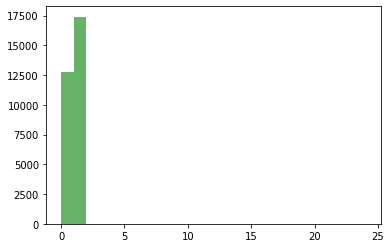

In [9]:
rewardProfiler.profile(rewards.SizeReward(Wandb=False))

In [25]:
s = SynthReward(False)
s.giveReward(mol)

Synth Reward Succesfully initialized


1.6538815862972296

RDKit ERROR: [15:15:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10
[15:15:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10

RDKit ERROR: 


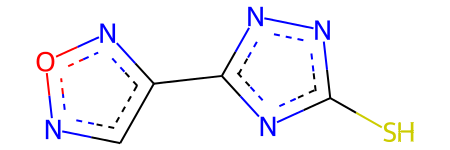

In [13]:
Chem.MolFromSmiles('Sc1nnc(-c2cnon2)n1', False)

In [22]:
for bond in (AdjustAromaticNs(Chem.MolFromSmiles('Sc1nnc(-c2cnon2)n1', False))).GetBonds():
    print(bond.GetBondType())
    
mol = AdjustAromaticNs(Chem.MolFromSmiles('Sc1nnc(-c2cnon2)n1', False))

SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC


RDKit ERROR: [15:16:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
[15:16:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

RDKit ERROR: [15:16:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
[15:16:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

